# `PsrWid` Usage

This notebook shows exaple usage of PsrWid algorithm on integrated pulse profiles.

In [4]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from PsrWid import *

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Useful Functions from `PsrWid`

### 1) `PsrWid.get_widths`
This function extracts and quantifies the on-pulse region of the pulsar profile. It also calculates \( W_{50} \) and \( W_{10} \) if required.

**Key Arguments:**
- `all_info=True`: Returns detailed information about the detected on-pulse regions, including start and end points and their uncertainties.
- `get_error=True`: Includes uncertainty in width estimation.
- `merge_size=<value>`: Merges consecutive on-pulse regions if they are separated by less than this value. (in radians)
- `remove_width_less_than=<value>`: Filters out on-pulse regions narrower than the given value to avoid false detections. (in radians)

**Outputs:**
- `wids`: A NumPy array containing detected on-pulse regions, their widths, and uncertainties (in rad).
- `thr, thrp, thrm`: The threshold determined by the kneedle algorithm and its uncertainty.
- `std`: Standard deviation of the mean profile from Gaussian Process Regression (GPR).
- `yerr`: Empirical estimation of white noise (used as input in GPR).

---

### 2) `PsrWid.plot_results`
This function visualizes the results of the `PsrWid` algorithm, producing a figure with three plots:

1. **Pulse Profile Plot:**
   - Displays the pulsar profile with a Gaussian Process Regression (GPR) fit.
   - The shaded region (in blue) represents the 1-sigma confidence interval around mean-fit.
   - The red horizontal line shows the threshold determined by the kneedle algorithm.
   - On-pulse region is shaded in lime-green colur

2. **Log-Polar Representation:**
   - represents the pulse profile into a log-polar format.
   - Useful for visualizing multi-component profiles and their phase separation.

3. **Threshold Detection (Kneedle Algorithm):**
   - Shows the Cumulative Distribution Function (CDF) of the GPR mean fit (teal curve).
   - The gray curve represents the distance curve, where the maximum corresponds to the location of the detected knee.
   - The knee point (threshold) is marked in red.

**Optional Argument:**
- `get_error=True`: Includes uncertainty in the detected widths in the visualization.


---

Following are the exaples of usage of PsrWid. The profiles are obtained from EPN data archive.

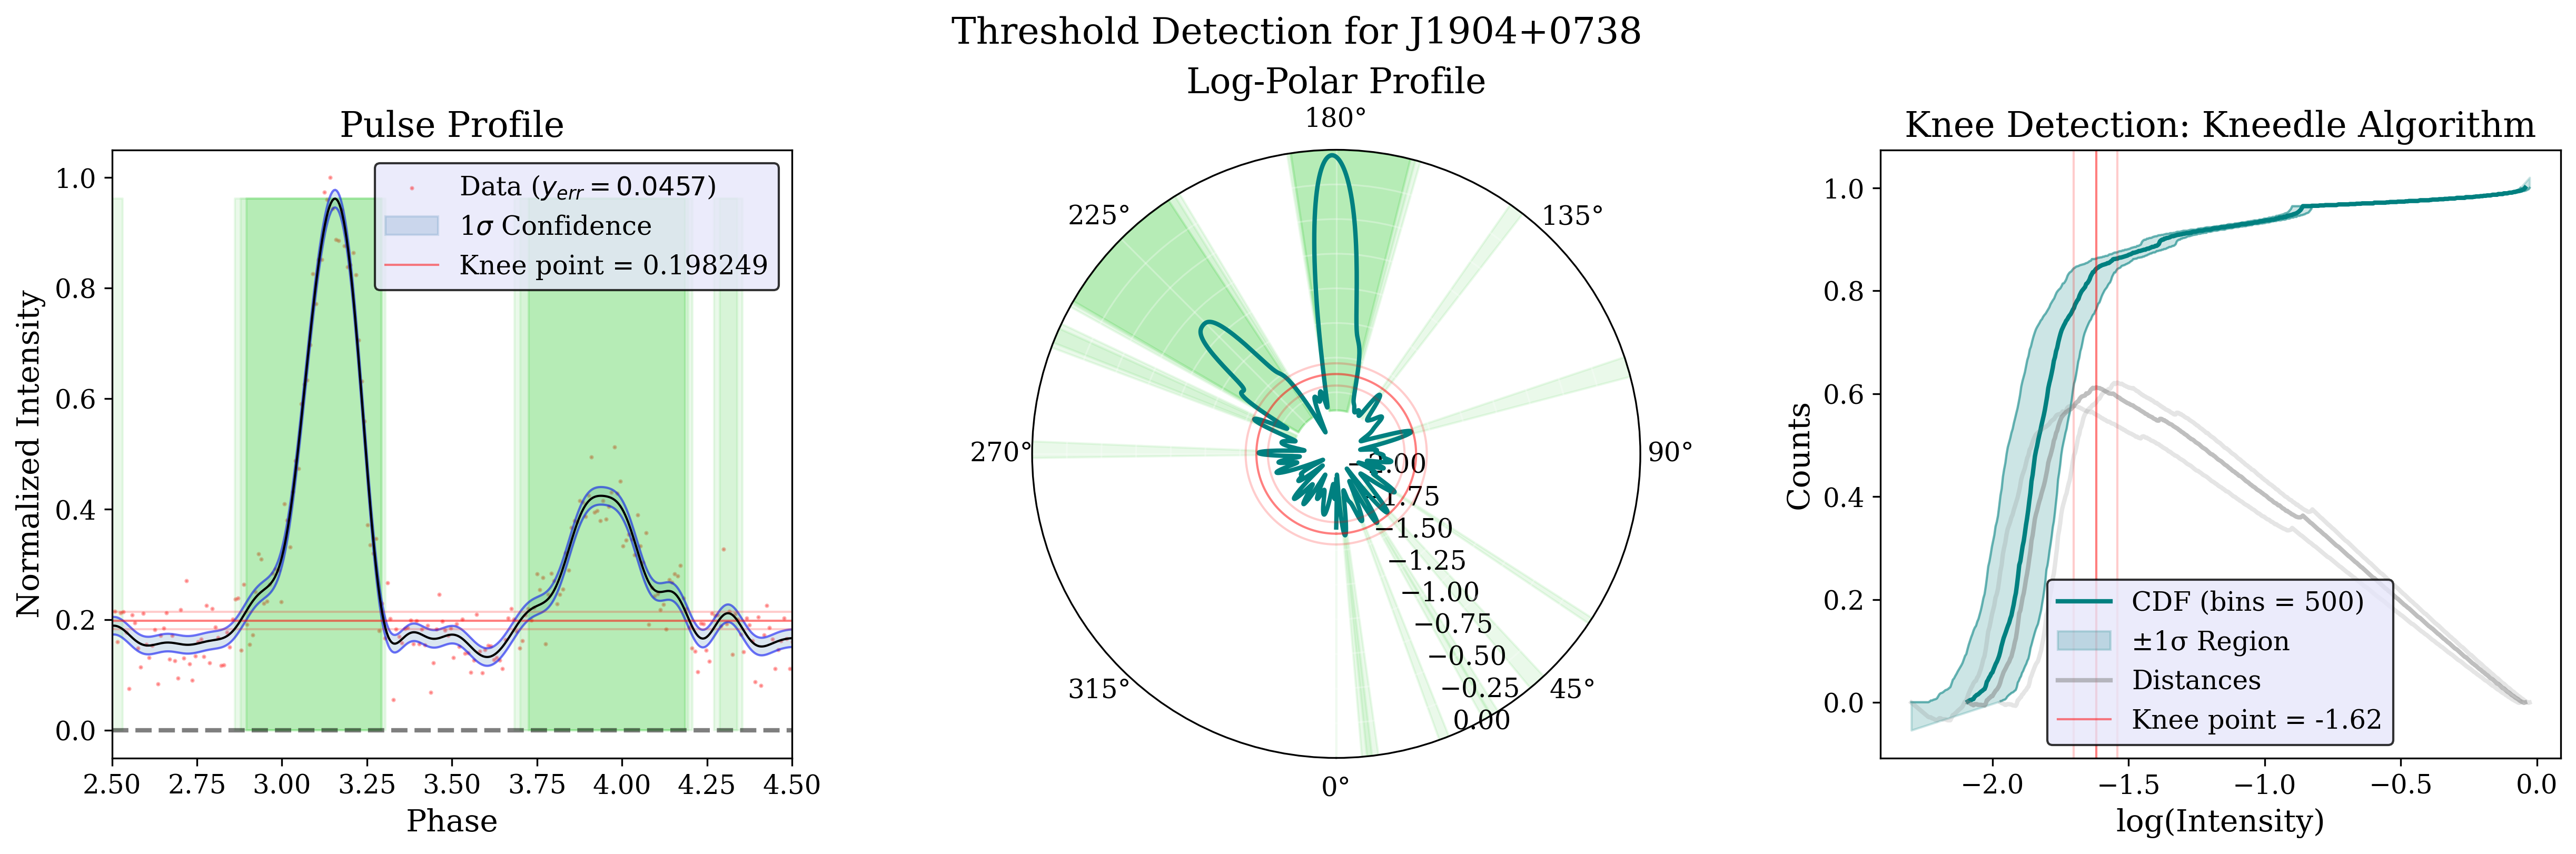

In [11]:
I_1904 = np.loadtxt('EPN_profiles\J1904+0738.57130la0.txt')[:,3]
analysis_1904 = PsrWid(I_1904)
wids, thr, thrp, thrm, std, yerr = analysis_1904.get_widths(get_error=True, all_info=True, merge_size=0.1, remove_width_less_than=0.1)
analysis_1904.plot_results(get_error=True, PSR_name='J1904+0738', xlim=(2.5, 4.5))

In [3]:
print(wids)

[[0.41775376 0.02531841 0.02109867]
 [0.49370899 0.02953814 0.03375788]]


In the above cell, the printed output displays information about two detected on-pulse regions. The first value in each list represents the nominal width, while the second and third values indicate the positive and negative uncertainties, respectively.

In [ ]:
wids = analysis_1904.get_widths(merge_size=0.1, remove_width_less_than=0.1, wid_50=True)
# width at 50% of the peak (in radians)
print(wids[1])

[0.20676701]


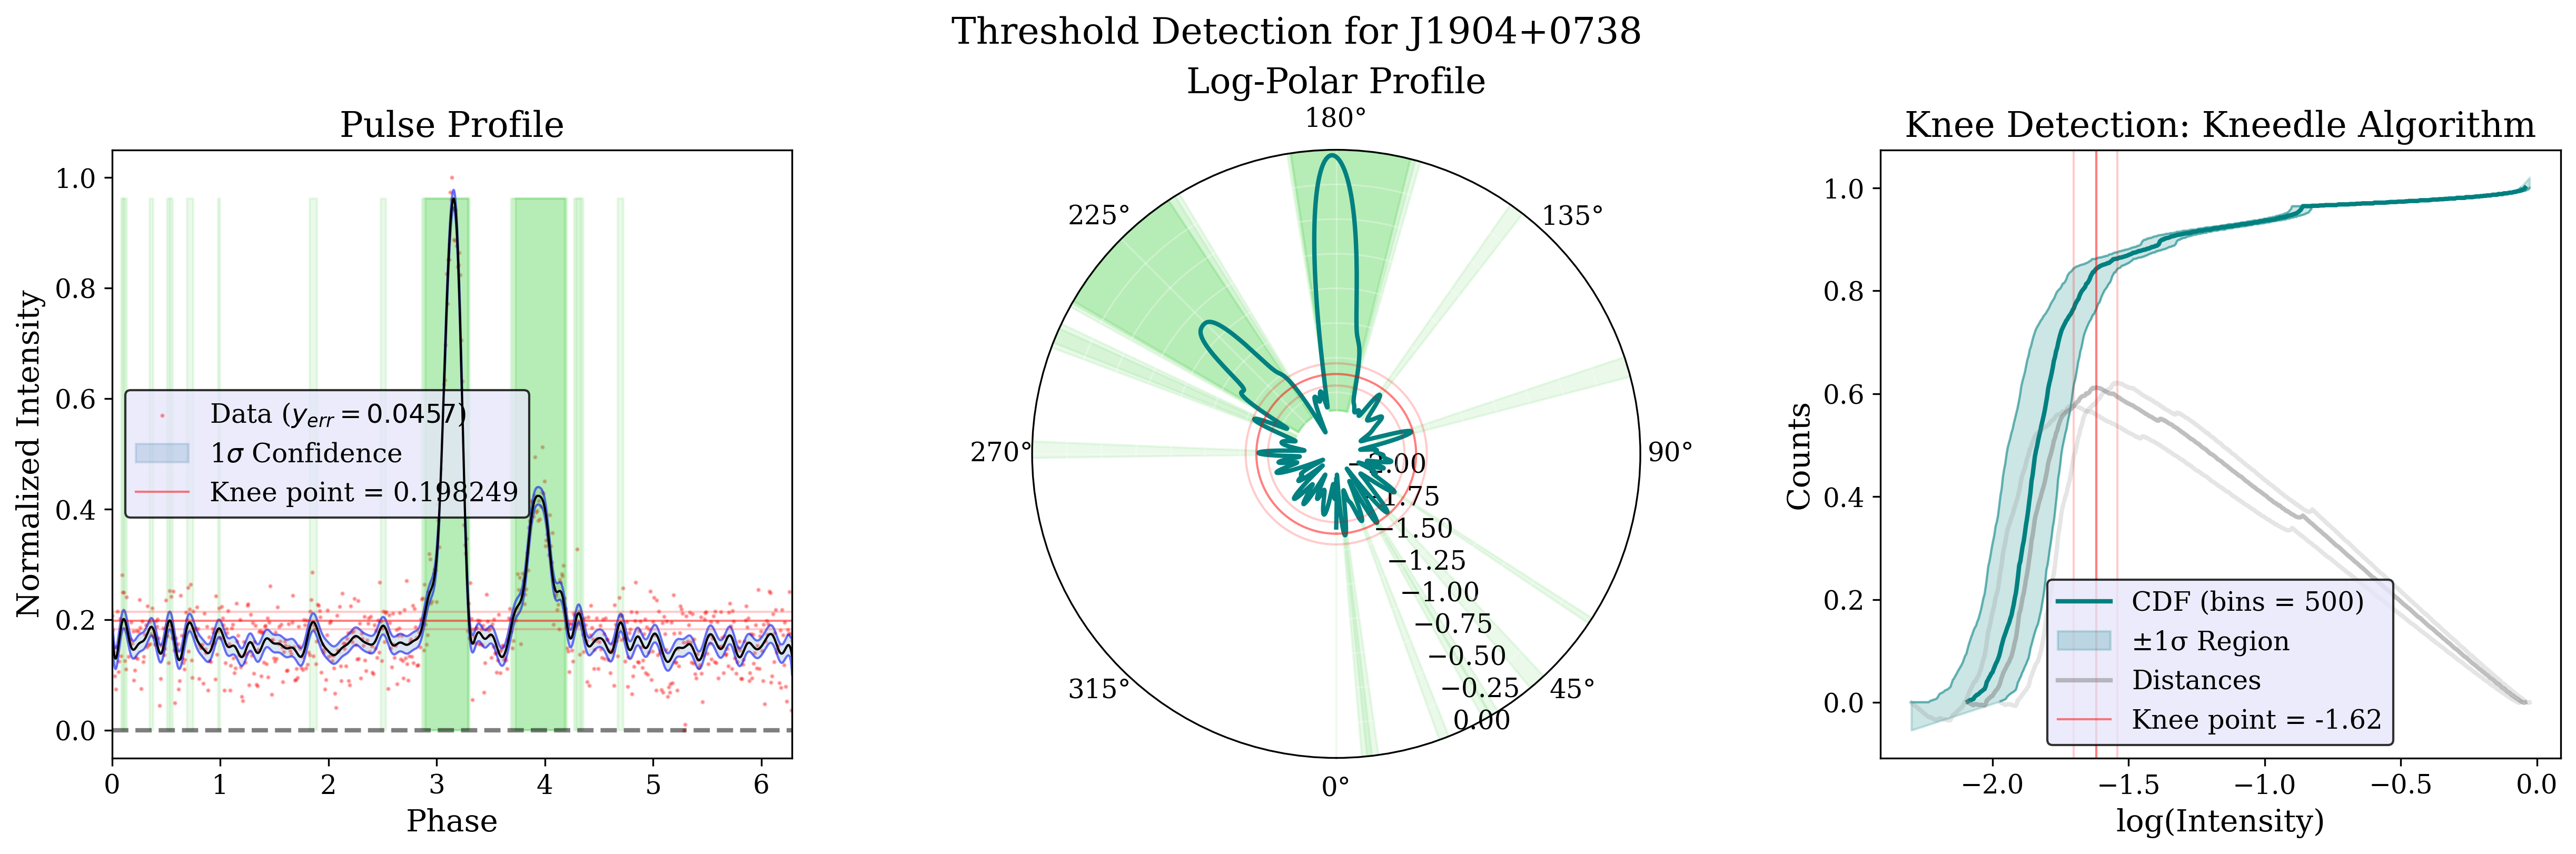

In [ ]:
I_1904 = np.loadtxt('EPN_profiles\J1904+0738.57130la0.txt')[:,3]
analysis_1904 = PsrWid(I_1904)
analysis_1904.plot_results(get_error=True, PSR_name='J1904+0738')